In [1]:
# myqlm version: 1.9.3
from qat.lang import H, CNOT


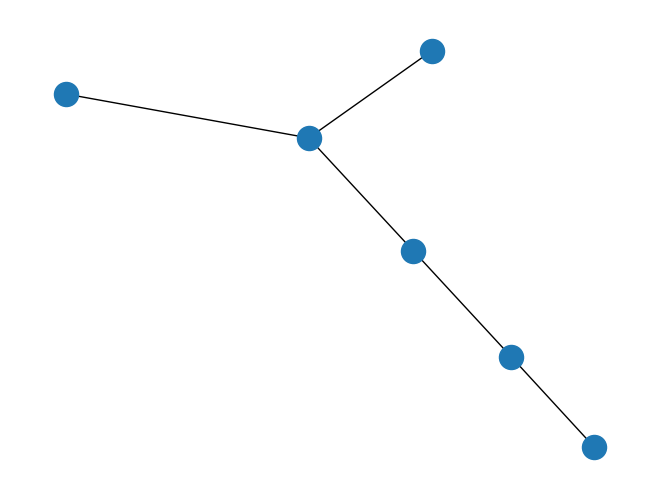

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qat.core import Observable, Term, Variable, Schedule, Batch

n_nodes = 6
graph = nx.generators.erdos_renyi_graph(n_nodes, 0.5)
nx.draw(graph)

# Define the Hamiltonians
H_target = sum(Observable(n_nodes, pauli_terms=[Term(1, "Z", [a])]) * \
               Observable(n_nodes, pauli_terms=[Term(1, "Z", [b])]) for a, b in graph.edges())

H_0 = - sum(Observable(n_nodes, pauli_terms=[Term(1, "X", [a])]) for a in range(n_nodes))
# Create the corresponding Schedule
t = Variable("t")
tmax = 23
schedule = Schedule(drive=[(1 - t / tmax, H_0), ( t / tmax, H_target)], tmax=tmax)

# %qatdisplay schedule 1 2 3 4 1 2 3 1



In [8]:
from qat.qpus import AnalogQPU # Create a Job
n_states = 2**n_nodes
psi_0 = np.ones(n_states) / np.sqrt(n_states)
job = schedule.to_job(observable=H_target, psi_0=psi_0) # Send it for simulation
qpu = AnalogQPU()
result = qpu.submit(job)


ImportError: cannot import name 'AnalogQPU' from 'qat.qpus' (/opt/homebrew/lib/python3.11/site-packages/qat/modules/__init__.so)

In [9]:
import qat.qpus

In [10]:
qat.__file__?

Type:        str
String form: /opt/homebrew/lib/python3.11/site-packages/qat/__init__.so
Length:      58
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.

In [2]:
from qat.lang.AQASM import Program, H, CNOT
# Create a Program
qprog = Program()
# Number of qbits
nbqbits = 2
# Allocate some qbits
qbits = qprog.qalloc(nbqbits)
# Apply some quantum Gates
H(qbits[0])


CNOT(qbits[0], qbits[1])
# Export this program into a quantum circuit
circuit = qprog.to_circ()

# Import a Quantum Processor Unit Factory (the default one)

from qat.qpus import get_default_qpu
# Create a Quantum Processor Unit
qpu = get_default_qpu()

# Create a job
job = circuit.to_job()

# Submit the job to the QPU
result = qpu.submit(job)

# Iterate over the final state vector to get all final components
for sample in result:
    print("State %s amplitude %s" % (sample.state, sample.amplitude))

from qat.core import Term
from qat.fermion.hamiltonians import SpinHamiltonian
nqbits = 2
H = SpinHamiltonian(nqbits, [Term(0.3, "X", [0]), Term(-0.4, "ZY", [0, 1])])
print(f"H = {H}")


/Users/rajarshi/venvs/myqlm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


State |00> amplitude (0.7071067811865475+0j)
State |11> amplitude (0.7071067811865475+0j)
H = 0.3 * (X|[0]) +
-0.4 * (ZY|[0, 1])


In [3]:
from qat.lang import qrout, H, CNOT
@qrout
def bell_pair():
    H(0)
    CNOT(0, 1)

result = bell_pair().run()

for sample in result:
    print(f"State {sample.state} amplitude {sample.amplitude}")

State |00> amplitude (0.7071067811865475+0j)
State |11> amplitude (0.7071067811865475+0j)


In [5]:
import qat.qpus

In [6]:
qat.qpus?

Type:            _QLMServiceModule
String form:     <module 'qat.qpus' (['/Users/rajarshi/venvs/myqlm/lib/python3.11/site-packages/qat'])>
File:            ~/venvs/myqlm/lib/python3.11/site-packages/qat/modules/__init__.so
Docstring:       <no docstring>
Class docstring: Module containins services of the QLM / myQLM